In [43]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
import keras

In [45]:
import glob

In [46]:
import cv2

In [47]:
import io

In [48]:
astilbe=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/astilbe/*")

In [49]:
bellflower=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/bellflower/*")

In [50]:
black_eyed_susan=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/black_eyed_susan/*")

In [51]:
calendula=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/calendula/*")

In [52]:
california_poppy=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/california_poppy/*")

In [53]:
carnation=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/carnation/*")

In [54]:
common_daisy=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/common_daisy/*")

In [55]:
coreopsis=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/coreopsis/*")

In [56]:
daffodil=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/daffodil/*")

In [57]:
dandelion=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/dandelion/*")

In [58]:
iris=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/iris/*")

In [59]:
magnolia=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/magnolia/*")

In [60]:
rose=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/rose/*")

In [61]:
sunflower=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/sunflower/*")

In [62]:
tulip=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/tulip/*")

In [63]:
water_lily=glob.glob("D:/SNT IS THE ROAD SAFE/flowers/water_lily/*")

In [64]:
train_files=np.concatenate([astilbe,bellflower,black_eyed_susan,calendula,california_poppy,carnation,common_daisy,coreopsis,daffodil,dandelion,iris,magnolia,rose,sunflower,tulip,water_lily])

In [65]:
len(train_files)

15740

In [66]:
train_files

array(['D:/SNT IS THE ROAD SAFE/flowers/astilbe\\10091895024_a2ea04cda6_c.jpg',
       'D:/SNT IS THE ROAD SAFE/flowers/astilbe\\1033455028_f0c6518ec9_c.jpg',
       'D:/SNT IS THE ROAD SAFE/flowers/astilbe\\10373087134_927b53fb9f_c.jpg',
       ...,
       'D:/SNT IS THE ROAD SAFE/flowers/water_lily\\9388505036_f567902ea1_c.jpg',
       'D:/SNT IS THE ROAD SAFE/flowers/water_lily\\9486809877_b11f0b7046_c.jpg',
       'D:/SNT IS THE ROAD SAFE/flowers/water_lily\\9567107261_1cf89d8b9a_c.jpg'],
      dtype='<U77')

In [67]:
from random import shuffle
shuffle(train_files)
train_files

array(['D:/SNT IS THE ROAD SAFE/flowers/dandelion\\4548256363_7a02ebb657_c.jpg',
       'D:/SNT IS THE ROAD SAFE/flowers/rose\\17837765634_e021e18bce_c.jpg',
       'D:/SNT IS THE ROAD SAFE/flowers/bellflower\\3595448255_79080b2253_c.jpg',
       ...,
       'D:/SNT IS THE ROAD SAFE/flowers/dandelion\\8679089274_ab743f88c2_c.jpg',
       'D:/SNT IS THE ROAD SAFE/flowers/common_daisy\\51132858440_a26a24590d_c.jpg',
       'D:/SNT IS THE ROAD SAFE/flowers/bellflower\\28964847647_5ba669a56d_c.jpg'],
      dtype='<U77')

In [81]:
from PIL import Image
img=Image.open(train_files[0])

In [82]:
train=np.array(img)
train.shape

(256, 256)

In [83]:
new_train= cv2.resize(train, dsize=(128,128), interpolation=cv2.INTER_CUBIC)
new_train.shape

(128, 128)

In [84]:
train_files[1]

'D:/SNT IS THE ROAD SAFE/flowers/rose\\17837765634_e021e18bce_c.jpg'

In [72]:
len(train_files)

15740

In [73]:
from PIL import Image

for j in range(0,len(train_files)):
  x = train_files[j]  
  image = Image.open(x)
  imgGray = img.convert('L')
  imgGray.save(x)

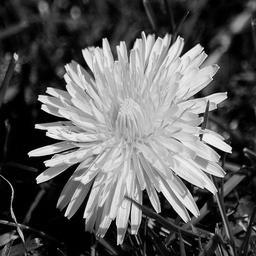

In [90]:
Image.open(train_files[0])

In [85]:
np.array(img).shape

(256, 256)

In [91]:
X_train=np.zeros((len(train_files),256,256))
Y_train=np.zeros((len(train_files),1))
for i, ft in enumerate(train_files):
    im=Image.open(ft)
    im_array=np.array(im)
    if(im_array.shape[0]==256 and im_array.shape[1]==256):
        X_train[i,:,:]=im_array
        Y_train[i]=(ord(ft[47])-97) + ((ord(ft[48])-97)*10) + ((ord(ft[49])-97)*100) + ((ord(ft[50])-97)*1000)

In [96]:
X_train[0]

array([[  6.,   3.,   1., ...,  77.,  80.,  78.],
       [  4.,   3.,   2., ...,  93.,  94.,  90.],
       [  3.,   2.,   3., ..., 110., 110., 104.],
       ...,
       [ 47.,  74., 106., ...,  55.,  42.,  39.],
       [ 55.,  79., 111., ...,  64.,  68.,  45.],
       [ 59.,  71., 114., ...,  30.,  66.,  51.]])

In [93]:
X_train[0]/255

array([[0.02352941, 0.01176471, 0.00392157, ..., 0.30196078, 0.31372549,
        0.30588235],
       [0.01568627, 0.01176471, 0.00784314, ..., 0.36470588, 0.36862745,
        0.35294118],
       [0.01176471, 0.00784314, 0.01176471, ..., 0.43137255, 0.43137255,
        0.40784314],
       ...,
       [0.18431373, 0.29019608, 0.41568627, ..., 0.21568627, 0.16470588,
        0.15294118],
       [0.21568627, 0.30980392, 0.43529412, ..., 0.25098039, 0.26666667,
        0.17647059],
       [0.23137255, 0.27843137, 0.44705882, ..., 0.11764706, 0.25882353,
        0.2       ]])

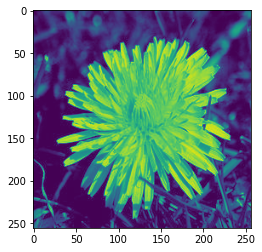

In [94]:
plt.imshow(img)

In [95]:
X_train[0][0][0]

6.0